In [2]:
import pandas as pd
import numpy as np
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from typing import Union, List
import joblib
import imblearn
import warnings
from collections import Counter
from imblearn.over_sampling import SMOTE
import matplotlib as plt
from sklearn import metrics

#warnings.filterwarnings(action='ignore')

## load data

In [3]:
df = pd.read_csv('modified_0420.csv')

In [4]:
#df = p.get_df()
print(df.shape)
df = df.drop(columns=['Unnamed: 0'])
df

(1131682, 91)


,loan_amnt,term,int_rate,installment,sub_grade,emp_length,loan_status,delinq_2yrs,inq_last_6mths,pub_rec,...,tax_liens_log,tot_cur_bal_log,tot_hi_cred_lim_log,total_acc_log,total_bal_ex_mort_log,total_bal_il_log,total_bc_limit_log,total_cu_tl_log,total_il_high_credit_limit_log,total_rev_hi_lim_log
0,6000.0,36,7.97,187.94,4,2,0,1.0,0.0,0.0,...,0.0,10.820878,11.272280,3.610918,10.820878,10.757158,9.615872,0.000000,10.942208,10.003378
1,23200.0,60,24.99,680.82,23,10,1,1.0,1.0,0.0,...,0.0,13.315176,13.386134,4.110874,12.592905,12.533767,9.918425,1.386294,12.582679,10.317450
2,16000.0,36,7.07,494.55,1,10,1,0.0,0.0,0.0,...,0.0,11.522113,12.186584,3.367296,10.390594,10.263641,10.987003,0.000000,10.806490,11.157692
3,4500.0,36,10.42,146.10,7,5,0,0.0,0.0,2.0,...,0.0,12.178635,12.263577,2.302585,9.166806,7.919356,9.137877,0.000000,9.390242,9.532496
4,20000.0,36,9.99,645.25,7,10,0,0.0,0.0,0.0,...,0.0,11.831590,12.137612,3.713572,11.101704,0.000000,9.305741,0.000000,11.199461,10.229224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131677,26500.0,60,17.27,662.45,14,2,0,0.0,0.0,0.0,...,0.0,12.346938,12.461776,2.833213,10.434557,0.000000,9.846970,0.000000,9.728241,10.507831
1131678,3600.0,36,19.99,133.78,20,7,1,0.0,0.0,0.0,...,0.0,11.195760,11.378571,2.302585,9.390493,0.000000,8.779711,0.000000,9.501217,9.278092
1131679,19000.0,36,6.68,583.89,2,4,0,0.0,0.0,0.0,...,0.0,12.388636,12.548072,3.526361,10.837304,0.000000,9.775711,0.000000,10.681688,10.225607
1131680,9600.0,36,14.33,329.65,10,9,0,0.0,1.0,0.0,...,0.0,11.884551,11.926941,2.197225,9.513256,0.000000,8.343078,0.000000,9.251002,8.881975


In [5]:
scaler = MinMaxScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df), index = df.index, columns = df.columns)

In [6]:
scaled_df

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,loan_status,delinq_2yrs,inq_last_6mths,pub_rec,...,tax_liens_log,tot_cur_bal_log,tot_hi_cred_lim_log,total_acc_log,total_bal_ex_mort_log,total_bal_il_log,total_bc_limit_log,total_cu_tl_log,total_il_high_credit_limit_log,total_rev_hi_lim_log
0,0.139241,0.0,0.103583,0.105319,0.117647,0.2,0.0,0.02381,0.000,0.000000,...,0.0,0.697662,0.699356,0.622291,0.731735,0.757636,0.691673,0.000000,0.751610,0.620630
1,0.574684,1.0,0.766355,0.393180,0.676471,1.0,1.0,0.02381,0.125,0.000000,...,0.0,0.858478,0.830503,0.746129,0.851564,0.882764,0.713436,0.316359,0.864292,0.640116
2,0.392405,0.0,0.068536,0.284391,0.029412,1.0,1.0,0.00000,0.000,0.000000,...,0.0,0.742873,0.756081,0.561947,0.702638,0.722877,0.790299,0.000000,0.742288,0.692246
3,0.101266,0.0,0.198988,0.080883,0.205882,0.5,0.0,0.00000,0.000,0.023256,...,0.0,0.785201,0.760858,0.298221,0.619883,0.557767,0.657291,0.000000,0.645007,0.591416
4,0.493671,0.0,0.182243,0.372405,0.205882,1.0,0.0,0.00000,0.000,0.000000,...,0.0,0.762826,0.753043,0.647718,0.750725,0.000000,0.669366,0.000000,0.769280,0.634642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131677,0.658228,1.0,0.465732,0.382451,0.411765,0.2,0.0,0.00000,0.000,0.000000,...,0.0,0.796052,0.773154,0.429656,0.705611,0.000000,0.708296,0.000000,0.668224,0.651928
1131678,0.078481,0.0,0.571651,0.073688,0.588235,0.7,1.0,0.00000,0.000,0.000000,...,0.0,0.721832,0.705950,0.298221,0.635009,0.000000,0.631528,0.000000,0.652630,0.575632
1131679,0.468354,0.0,0.053349,0.336569,0.058824,0.4,0.0,0.00000,0.000,0.000000,...,0.0,0.798741,0.778508,0.601347,0.732846,0.000000,0.703171,0.000000,0.733715,0.634418
1131680,0.230380,0.0,0.351246,0.188083,0.294118,0.9,0.0,0.00000,0.125,0.000000,...,0.0,0.766240,0.739972,0.272123,0.643310,0.000000,0.600121,0.000000,0.635443,0.551056


## Design Matrix

In [7]:
df_X = scaled_df.drop(columns=['loan_status'])
df_y = scaled_df['loan_status']

pca1 = PCA(n_components = 56)
pca1.fit(df_X)
df_Xpca = pca1.transform(df_X)

Xpca_train, Xpca_test, ypca_train, ypca_test = train_test_split(df_Xpca, df_y, test_size = 0.2, random_state = 30)

In [8]:
df_X = scaled_df.drop(columns=['loan_status'])
df_y = scaled_df['loan_status']

In [9]:
pca2 = PCA(n_components = 86)
pca2.fit(df_X)
df_Xpca = pca2.transform(df_X)

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.2, random_state = 30)

In [10]:
#smote oversample
smote = SMOTE(random_state = 30)

X_train, y_train = smote.fit_resample(X_train, y_train)
Xpca_train, ypca_train = smote.fit_resample(Xpca_train, ypca_train)

In [11]:
ss = pd.DataFrame(X_train)
ss

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,delinq_2yrs,inq_last_6mths,pub_rec,revol_util,...,tax_liens_log,tot_cur_bal_log,tot_hi_cred_lim_log,total_acc_log,total_bal_ex_mort_log,total_bal_il_log,total_bc_limit_log,total_cu_tl_log,total_il_high_credit_limit_log,total_rev_hi_lim_log
0,0.492405,1.0,0.553349,0.301147,0.647059,1.000000,0.000000,0.000000,0.000000,0.052100,...,0.000000,0.686263,0.680432,0.398653,0.719780,0.000000,0.680266,0.000000,0.735807,0.586749
1,0.291139,0.0,0.150312,0.218979,0.176471,0.000000,0.000000,0.125000,0.000000,0.177305,...,0.000000,0.622734,0.659501,0.242949,0.653148,0.000000,0.410515,0.000000,0.713299,0.564899
2,0.367089,0.0,0.496495,0.312536,0.470588,0.000000,0.000000,0.000000,0.000000,0.187943,...,0.000000,0.861628,0.836554,0.242949,0.639941,0.655097,0.546772,0.158180,0.718297,0.492473
3,0.240506,0.0,0.079439,0.176829,0.088235,0.700000,0.000000,0.125000,0.000000,0.019367,...,0.000000,0.527865,0.672389,0.398653,0.553646,0.000000,0.752822,0.000000,0.000000,0.672389
4,0.406962,0.0,0.454829,0.340645,0.500000,0.700000,0.000000,0.000000,0.000000,0.146481,...,0.000000,0.698497,0.697500,0.534898,0.732612,0.000000,0.636858,0.000000,0.731054,0.648082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444681,0.334755,1.0,0.544712,0.204623,0.517080,1.000000,0.000000,0.059137,0.011628,0.120695,...,0.081993,0.632254,0.658810,0.381564,0.663133,0.000000,0.573588,0.000000,0.694118,0.598044
1444682,0.365844,0.0,0.114698,0.270176,0.147569,0.701735,0.000000,0.000000,0.011628,0.125295,...,0.000000,0.734428,0.744530,0.382394,0.714626,0.722542,0.720724,0.366608,0.729123,0.621719
1444683,0.169651,0.0,0.323399,0.139228,0.290603,0.511951,0.013328,0.000000,0.000000,0.186278,...,0.000000,0.670709,0.659605,0.334912,0.703466,0.711684,0.647543,0.000000,0.707155,0.581750
1444684,0.253078,0.0,0.211774,0.196619,0.188215,0.230034,0.000000,0.337457,0.000000,0.077663,...,0.000000,0.621858,0.643423,0.363350,0.652230,0.646521,0.675749,0.158180,0.661262,0.589488


## Fitting

In [12]:
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import LogisticRegressionCV

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

c:\Users\Na\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


              precision    recall  f1-score   support

         0.0       0.86      0.44      0.58    180654
         1.0       0.24      0.71      0.36     45683

    accuracy                           0.49    226337
   macro avg       0.55      0.57      0.47    226337
weighted avg       0.73      0.49      0.53    226337



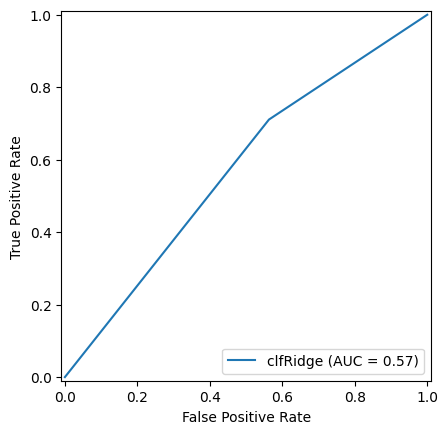

In [15]:
clfQDA = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
y_pred = clfQDA.predict(X_test)
joblib.dump(clfQDA, 'clfQDA_2.pkl')
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name='clfRidge')
display.plot()

## RidgeClassifier

In [26]:
clfRidge = RidgeClassifierCV().fit(X_train, y_train)

In [36]:
y_pred = clfRidge.predict(X_test)
joblib.dump(clfRidge, 'clfRidge_2.pkl')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.66      0.75    180654
         1.0       0.32      0.65      0.43     45683

    accuracy                           0.66    226337
   macro avg       0.60      0.65      0.59    226337
weighted avg       0.77      0.66      0.69    226337



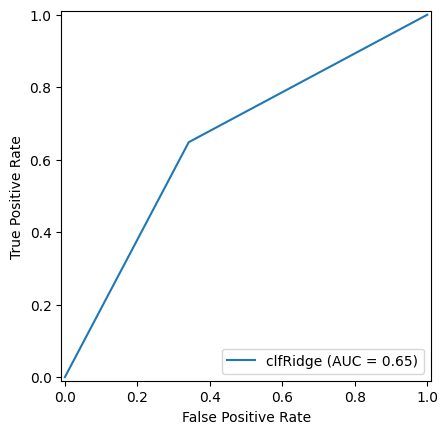

In [37]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name='clfRidge')
display.plot()

Text(0.5, 1.0, 'ex2_ridge_nonpca')

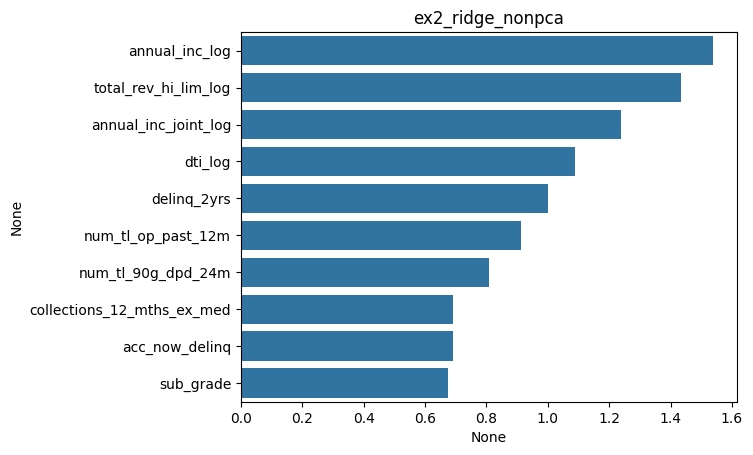

In [40]:
coefs = [abs(x) for x in clfRidge.coef_[0]]
fi = pd.Series(coefs, index= X_train.columns).sort_values(ascending=False).iloc[:10]

figs = sns.barplot(x=fi, y=fi.index)
plt.pyplot.title('ex2_ridge_nonpca')

In [15]:
pcaRidge = RidgeClassifierCV().fit(Xpca_train, ypca_train)

In [16]:
y_pred = pcaRidge.predict(Xpca_test)
joblib.dump(pcaRidge, 'pcaRidge_2.pkl')
print(classification_report(ypca_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.66      0.75    180654
         1.0       0.32      0.64      0.43     45683

    accuracy                           0.66    226337
   macro avg       0.60      0.65      0.59    226337
weighted avg       0.77      0.66      0.69    226337



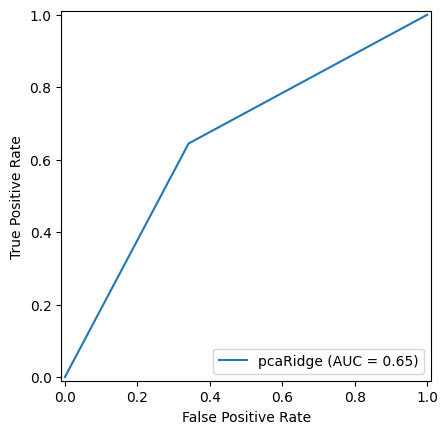

In [17]:
fpr, tpr, thresholds = metrics.roc_curve(ypca_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name='pcaRidge')
display.plot()

## LassoClassifier

In [18]:
clfLasso = LogisticRegressionCV(penalty='l1', solver = 'saga').fit(X_train, y_train)

In [19]:
y_pred = clfLasso.predict(X_test)
joblib.dump(clfLasso, 'clfLasso_2.pkl')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.66      0.75    180654
         1.0       0.32      0.65      0.43     45683

    accuracy                           0.66    226337
   macro avg       0.60      0.65      0.59    226337
weighted avg       0.77      0.66      0.69    226337



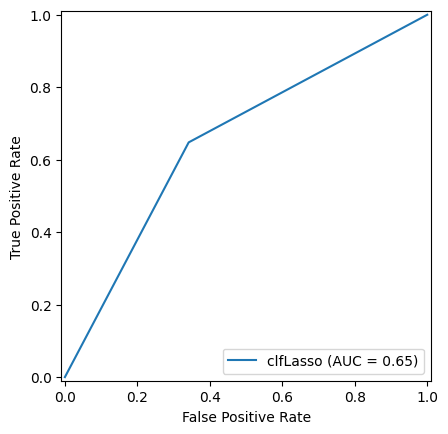

In [20]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name='clfLasso')
display.plot()

In [21]:
pcaLasso = LogisticRegressionCV(penalty='l1', solver = 'saga').fit(Xpca_train, ypca_train)

In [22]:
y_pred = pcaLasso.predict(Xpca_test)
joblib.dump(pcaLasso, 'pcaLasso_2.pkl')
print(classification_report(ypca_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.66      0.75    180654
         1.0       0.32      0.65      0.43     45683

    accuracy                           0.66    226337
   macro avg       0.60      0.65      0.59    226337
weighted avg       0.77      0.66      0.69    226337



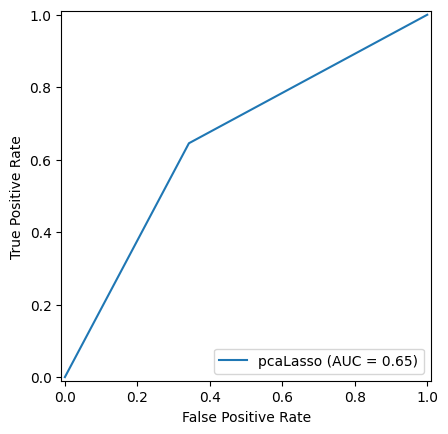

In [23]:
fpr, tpr, thresholds = metrics.roc_curve(ypca_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name='pcaLasso')
display.plot()

## Random Forest

In [11]:
clfRF = RandomForestClassifier(max_depth = 30, random_state = 30)
clfRF.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, random_state=30)

In [12]:
y_pred = clfRF.predict(X_test)
joblib.dump(clfRF, 'clfRF_2.pkl')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88    180654
         1.0       0.47      0.16      0.23     45683

    accuracy                           0.79    226337
   macro avg       0.64      0.56      0.56    226337
weighted avg       0.75      0.79      0.75    226337



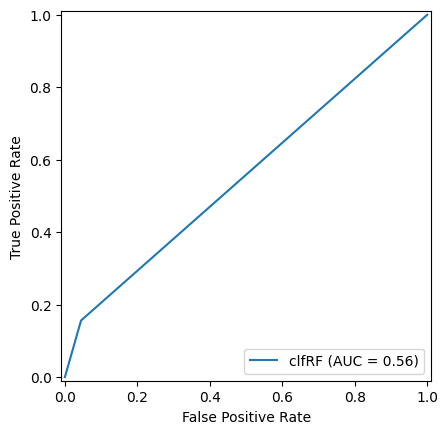

In [13]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name='clfRF')
display.plot()

In [14]:
pcaRF = RandomForestClassifier(max_depth = 30, random_state = 30)
pcaRF.fit(Xpca_train, ypca_train)

RandomForestClassifier(max_depth=30, random_state=30)

In [15]:
y_pred = pcaRF.predict(Xpca_test)
joblib.dump(pcaRF, 'pcaRF_2.pkl')
print(classification_report(ypca_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.81      0.83    180654
         1.0       0.35      0.41      0.38     45683

    accuracy                           0.73    226337
   macro avg       0.60      0.61      0.60    226337
weighted avg       0.75      0.73      0.74    226337



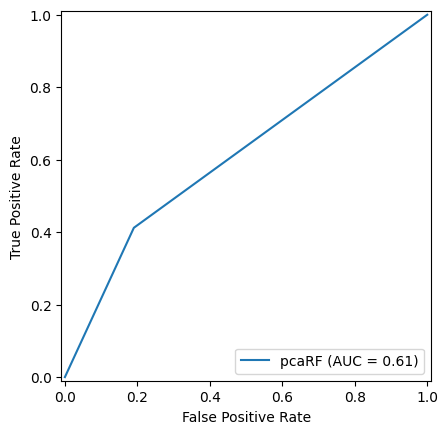

In [16]:
fpr, tpr, thresholds = metrics.roc_curve(ypca_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name='pcaRF')
display.plot()

## xgBoost

In [13]:
clfXGB = XGBClassifier(random_state = 30, max_depth = 30)
clfXGB.fit(X_train, y_train)
clfXGB

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=30, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=30, ...)

In [41]:
pred = clfXGB.predict(X_test)
joblib.dump(clfXGB, 'clfXGB_2.pkl')
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.81      0.96      0.88    180654
         1.0       0.48      0.13      0.21     45683

    accuracy                           0.80    226337
   macro avg       0.65      0.55      0.55    226337
weighted avg       0.75      0.80      0.75    226337



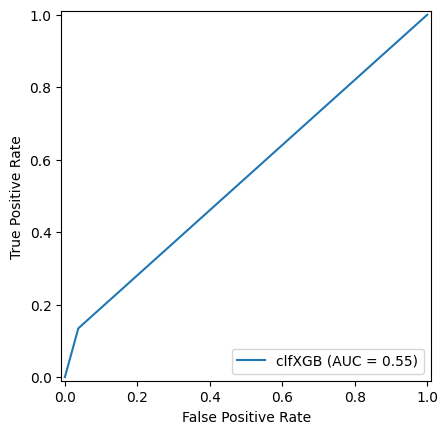

In [42]:
fpr, tpr, thresholds = metrics.roc_curve(ypca_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name='clfXGB')
display.plot()

Text(0.5, 1.0, 'ex2_xgb_nonpca')

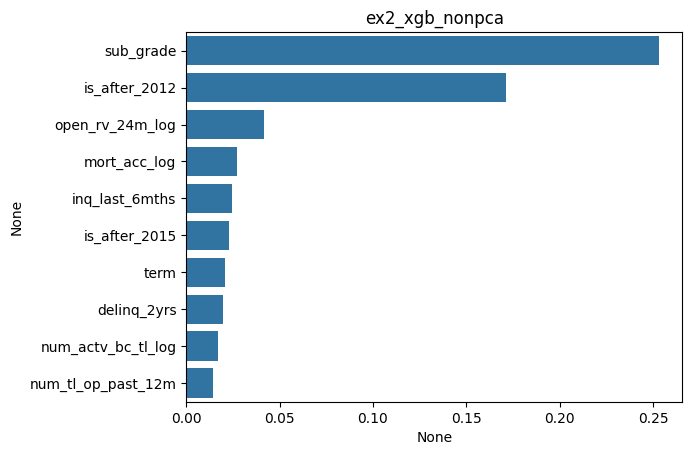

In [44]:
import seaborn as sns
fi = pd.Series(clfXGB.feature_importances_, index= X_train.columns).sort_values(ascending=False).iloc[:10]

figs = sns.barplot(x=fi, y=fi.index)
plt.pyplot.title('ex2_xgb_nonpca')

In [20]:
pcaXGB = XGBClassifier(seed = 30, max_depth = 30)
pcaXGB.fit(Xpca_train, ypca_train)
pcaXGB

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=30, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [21]:
pred = pcaXGB.predict(Xpca_test)
joblib.dump(pcaXGB, 'pcaXGB_2.pkl')
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84    180654
         1.0       0.36      0.32      0.34     45683

    accuracy                           0.75    226337
   macro avg       0.59      0.59      0.59    226337
weighted avg       0.74      0.75      0.74    226337



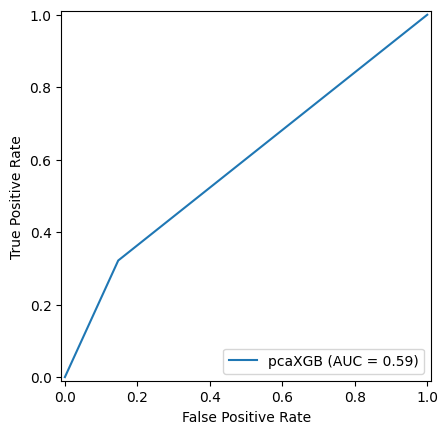

In [22]:
fpr, tpr, thresholds = metrics.roc_curve(ypca_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name='pcaXGB')
display.plot()

## SVM bouns

In [ ]:
y_pred = pcaSVM.predict(Xpca_test)
joblib.dump(pcaSVM, 'pcaSVM.pkl')
print(classification_report(ypca_test, y_pred))